<a href="https://colab.research.google.com/github/ozlemizgi/data_heartmedical/blob/main/Heart5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KALP HASTALIĞI- MENDELEY DATA LİNKİ**: https://data.mendeley.com/datasets/65gxgy2nmg/2


**FEATURE DESCRIPTION**
- ID: Numara
-Age: Yaş
-Gender: Cinsiyet (1:kadın , 0: erkek)
-Impluse: Nabız
-Pressurehight: Basınç yüksekliği
-Pressurelow: Düşük Basınç
-Glucose: Kan şekeri
-KCM:(CK_MB)kreatin kinaz miyokard bandı (kandaki kreatin kinaz değerini ölçer)
-Troponin: Troponin testi
-class: sınıf 
(pozitif:kalp krizinin olduğunu ; negatif:kalp krizinin olmadığını gösterir.)











In [2]:
# Kütüphanelerin Çağırılması
import numpy as np
import pandas as pd

from sklearn import preprocessing

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Veriyi okumadan önce Sütun isimlerini içerisinde barındıran bir liste oluşturduk, kendi istediğimiz gibi isimlendirdik.
features = ["id" , "age" , "gender", "impluse" , "pressurehight" , "pressurelow" , "glucose" , "kcm" , "troponin" , "glass"]

# Veriyi okurken names= features diyerek kendi veridiğimiz isimlere göre okuması için komut verdik.
heart = pd.read_csv("https://raw.githubusercontent.com/ozlemizgi/data_heartmedical/main/csv_result-Medicaldataset.csv", names= features, header=0)
heart.sample(9)

,id,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,glass
476,477,70,1,87,141,81,106.0,0.929,1.150,positive
537,538,53,1,82,147,103,346.0,5.110,0.006,negative
448,449,46,0,91,153,82,366.0,1.940,4.320,positive
393,394,66,1,62,105,70,290.0,300.000,0.016,positive
933,934,58,1,72,130,80,117.0,4.400,0.009,negative
407,408,28,0,79,95,52,200.0,4.800,0.004,negative
117,118,66,1,73,108,61,93.0,8.840,0.061,positive
918,919,27,1,98,91,50,147.0,1.200,0.005,negative
501,502,59,0,62,76,55,130.0,2.210,0.145,positive


In [4]:
# Verisetindeki kalp krizi ile ilgili inceleme dışında kalacak ID sütunlarını veri setinden kaldıralım.
# Bunun için .drop() komutunu kullanırız.
heart = heart.drop(["kcm" , "glucose"], axis=1)
heart.sample(9)

,id,age,gender,impluse,pressurehight,pressurelow,troponin,glass
1099,1100,43,0,60,144,54,0.016,positive
364,365,65,0,70,150,75,0.008,negative
1120,1121,64,1,83,140,81,0.023,positive
953,954,74,1,62,131,70,0.023,positive
520,521,51,0,100,117,57,0.004,negative
380,381,29,1,90,129,90,0.003,positive
614,615,52,1,86,113,68,0.005,positive
583,584,44,1,74,155,77,0.044,positive
977,978,71,0,82,164,90,0.020,positive


In [5]:
# Veri setinin boyutları
print("Satır:", heart.shape[0], '\t', "Sütun:", heart.shape[1])

# bir Satır boşluk bırak
print("-"*80)

# Veri setinin sütun isimleri
print(heart.columns)

Satır: 1319 	 Sütun: 8
--------------------------------------------------------------------------------
Index(['id', 'age', 'gender', 'impluse', 'pressurehight', 'pressurelow',
       'troponin', 'glass'],
      dtype='object')


In [6]:
# Veriseti hakkında genel bilgi 
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1319 non-null   int64  
 1   age            1319 non-null   int64  
 2   gender         1319 non-null   int64  
 3   impluse        1319 non-null   int64  
 4   pressurehight  1319 non-null   int64  
 5   pressurelow    1319 non-null   int64  
 6   troponin       1319 non-null   float64
 7   glass          1319 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 82.6+ KB


In [7]:
heart.sample(5)

,id,age,gender,impluse,pressurehight,pressurelow,troponin,glass
1315,1316,66,1,84,125,55,0.172,positive
57,58,29,1,57,140,52,0.011,positive
248,249,50,0,63,129,67,0.003,negative
532,533,53,1,51,118,50,0.007,negative
152,153,58,1,103,78,92,0.008,negative


In [8]:
heart["glass"].value_counts()

positive    810
negative    509
Name: glass, dtype: int64

**glass**
- 0 : pozitive , 1 : negative

**gender**
- 1 : F , 0 : M

In [9]:
# replace() : verileri değiştirmek için kullanırız.
heart = heart.replace({'glass': {"positive": 0, "negative": 1, }})
heart.sample(12)

,id,age,gender,impluse,pressurehight,pressurelow,troponin,glass
533,534,22,1,56,126,63,0.004,1
742,743,63,0,74,140,85,0.011,1
483,484,70,0,91,147,65,0.020,0
1087,1088,57,0,80,118,64,0.006,1
112,113,38,0,89,111,57,0.003,1
41,42,50,1,95,101,76,0.005,1
599,600,71,1,82,138,82,0.165,0
1206,1207,59,1,85,140,82,0.980,0
147,148,44,0,91,100,71,0.014,1
1274,1275,70,1,103,126,75,0.014,1


In [10]:
heart.info

<bound method DataFrame.info of         id  age  gender  impluse  pressurehight  pressurelow  troponin  glass
0        1   64       1       66            160           83     0.012      1
1        2   21       1       94             98           46     1.060      0
2        3   55       1       64            160           77     0.003      1
3        4   64       1       70            120           55     0.122      0
4        5   55       1       64            112           65     0.003      1
...    ...  ...     ...      ...            ...          ...       ...    ...
1314  1315   44       1       94            122           67     0.006      1
1315  1316   66       1       84            125           55     0.172      0
1316  1317   45       1       85            168          104     4.250      0
1317  1318   54       1       58            117           68     0.359      0
1318  1319   51       1       94            157           79     1.770      0

[1319 rows x 8 columns]>

In [11]:
# Veriyi istatistiksel açıdan inceleyelim.
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1319.0,660.000000,380.906813,1.000,330.500,660.000,989.5000,1319.0
age,1319.0,56.191812,13.647315,14.000,47.000,58.000,65.0000,103.0
gender,1319.0,0.659591,0.474027,0.000,0.000,1.000,1.0000,1.0
impluse,1319.0,78.336619,51.630270,20.000,64.000,74.000,85.0000,1111.0
pressurehight,1319.0,127.170584,26.122720,42.000,110.000,124.000,143.0000,223.0
pressurelow,1319.0,72.269143,14.033924,38.000,62.000,72.000,81.0000,154.0
troponin,1319.0,0.360942,1.154568,0.001,0.006,0.014,0.0855,10.3
glass,1319.0,0.385898,0.486991,0.000,0.000,0.000,1.0000,1.0


In [12]:
# isnull() komutu sütunlardaki eksik değer sayısını sayar. sum() komutu ise toplam ifadesidir.  
heart.isnull().sum()

id               0
age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
troponin         0
glass            0
dtype: int64

(eksik veri olmadığı için bir sonraki kodu yapamadım)


In [14]:
X = heart.drop(["impluse"], axis=1)
y = heart["impluse"]

In [17]:
scaler = preprocessing.MinMaxScaler()


In [19]:
scaled = scaler.fit_transform(X)

In [20]:
X_minmax = pd.DataFrame(scaled)

In [21]:
heart.sample(2)

,id,age,gender,impluse,pressurehight,pressurelow,troponin,glass
1026,1027,64,1,67,120,60,0.009,1
436,437,42,1,75,138,67,0.003,1


In [22]:
scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(X)
X_minmax = pd.DataFrame(scaled)

In [23]:
X_minmax.sample(6)

,0,1,2,3,4,5,6
1113,0.844461,0.550562,1.0,0.408840,0.310345,0.002233,0.0
576,0.437026,0.606742,1.0,0.392265,0.224138,0.001651,0.0
1157,0.877845,0.303371,1.0,0.248619,0.129310,0.000194,1.0
796,0.603945,0.393258,1.0,0.386740,0.310345,0.569861,0.0
1192,0.904401,0.516854,1.0,0.392265,0.379310,0.005437,0.0
1217,0.923369,0.662921,0.0,0.320442,0.284483,0.001845,0.0


In [24]:
scaler = preprocessing.StandardScaler()
scaled = scaler.fit_transform(X)
X_standart = pd.DataFrame(scaled)

In [25]:
X_standart.sample(8)

,0,1,2,3,4,5,6
152,-1.331539,0.132544,0.718395,-1.883006,1.406473,-0.305808,1.261489
424,-0.617183,0.279149,0.718395,-0.887326,-0.518166,-0.150713,-0.792714
357,-0.793146,-0.087363,-1.391991,0.031763,-1.658693,-0.296277,-0.792714
1099,1.155576,-0.966990,-1.391991,0.644489,-1.302278,-0.298877,-0.792714
91,-1.491744,0.425753,0.718395,-0.121419,-1.017146,-0.304075,1.261489
1157,1.307902,-1.113594,0.718395,-1.538347,-1.373561,-0.310140,1.261489
1163,1.323660,1.232078,-1.391991,-1.653234,-1.302278,-0.303209,1.261489
1155,1.302650,0.499056,0.718395,-1.040508,-0.304317,-0.310140,1.261489


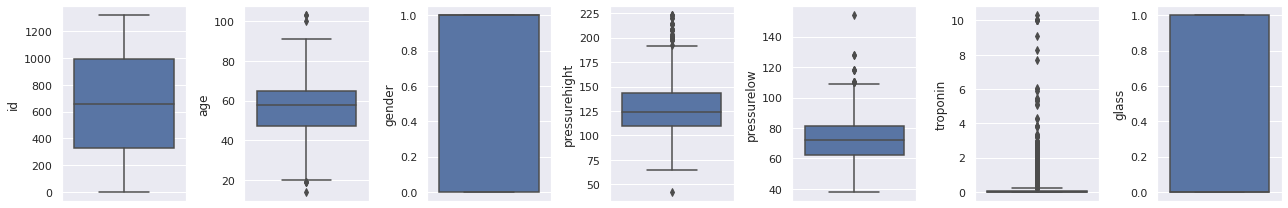

In [27]:
plt.figure(figsize=(18,3))
for i,att in enumerate(X.columns):
    plt.subplot(1,len(X.columns),i+1)
    sns.boxplot(y=heart[att])
plt.tight_layout()
plt.show()

In [31]:
# Outlier değerlerin indeksleri , troponin değerinin 7 den fazla olan örnekler
print(np.where(heart['troponin']>7))

(array([  29,   30,  113,  475,  753,  988, 1003, 1028, 1048, 1094, 1252,
       1310]),)


In [43]:
# Outlier değerlerin indeksleri , 18 yaşından küçüklerin örnek numaraları.
print(np.where(heart['age']<18))

(array([899]),)


In [44]:
# Outlier değerlerin indeksleri , nabız değerlerinin 1000 üstünde olan örnek numaraları.
print(np.where(heart['impluse']>1000))

(array([  63,  717, 1069]),)


In [45]:
# Outlier değerlerin indeksleri, yüksek basıncın 175 den fazla olan değerlerin örnek numaraları.
print(np.where(heart['pressurehight']>175))

(array([   6,    7,   12,   89,  110,  179,  186,  205,  220,  263,  311,
        366,  403,  411,  427,  428,  429,  460,  461,  465,  486,  487,
        514,  560,  643,  645,  666,  667,  670,  673,  744,  769,  781,
        855,  857,  893,  896,  926,  967,  969,  995,  996,  999, 1003,
       1035, 1096, 1124, 1140, 1226, 1228, 1264, 1267, 1285, 1302, 1313]),)


In [46]:
# Outlier değerlerin indeksleri, düşük basıncın 50 den küçük olan değerlerin örnek numaraları.
print(np.where(heart['pressurelow']<50))

(array([   1,   32,   96,  138,  140,  215,  216,  271,  294,  331,  357,
        367,  406,  408,  411,  513,  606,  608,  611,  626,  631,  660,
        751,  803,  822,  851,  854,  857,  909,  926,  935,  944,  949,
        989, 1103, 1153, 1167, 1188, 1222, 1225, 1228, 1280, 1302]),)


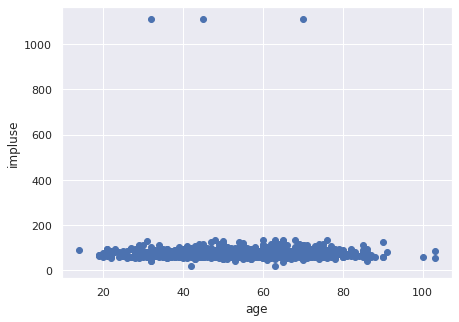

In [47]:
# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(heart['age'], heart['impluse'])
 
# x-axis label
ax.set_xlabel('age')
 
# y-axis label
ax.set_ylabel('impluse')
plt.show()

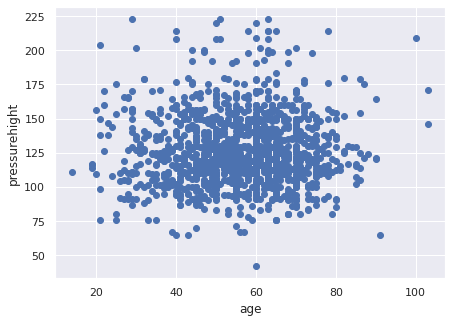

In [48]:
# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(heart['age'], heart['pressurehight'])
 
# x-axis label
ax.set_xlabel('age')
 
# y-axis label
ax.set_ylabel('pressurehight')
plt.show()

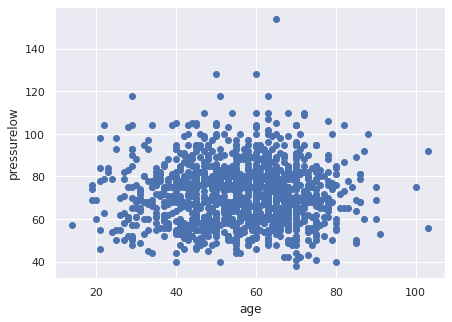

In [49]:
# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(heart['age'], heart['pressurelow'])
 
# x-axis label
ax.set_xlabel('age')
 
# y-axis label
ax.set_ylabel('pressurelow')
plt.show()

In [52]:
pre_process_df = heart
candidate_atts = ["age" , "troponin" , "pressurehight" , "pressurelow"]

for att in candidate_atts:
    Q3 = pre_process_df[att].quantile(0.75)
    Q1 = pre_process_df[att].quantile(0.25)
    IQR = Q3 - Q1

    lower_cap = Q1-IQR*1.5
    upper_cap = Q3+IQR*1.5

    BM = pre_process_df[att] < lower_cap
    candidate_index = pre_process_df[BM].index
    pre_process_df.loc[candidate_index,att] = lower_cap

    BM = pre_process_df[att] > upper_cap
    candidate_index = pre_process_df[BM].index
    pre_process_df.loc[candidate_index,att] = upper_cap

In [53]:
print(heart.shape)
print(pre_process_df.shape)

(1319, 8)
(1319, 8)


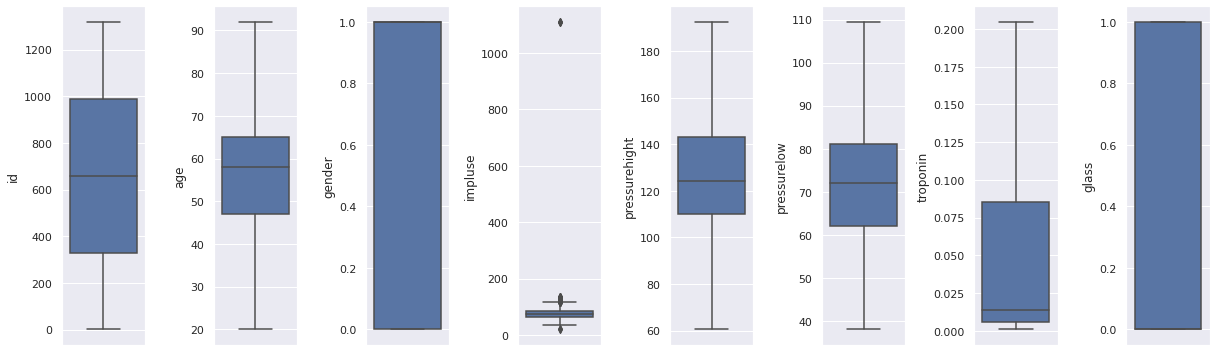

In [55]:
plt.figure(figsize=(17,5))
for i,att in enumerate(pre_process_df.columns):
    plt.subplot(1,len(pre_process_df.columns),i+1)
    sns.boxplot(y=pre_process_df[att])
plt.tight_layout()
plt.show()

## ***Glukoz ve KCM değerlerini çıkarttığımız için tekrardan ekleyip yaptığımız kodları bu iki değer için de denedim.***

In [56]:
heart = pd.read_csv("https://raw.githubusercontent.com/ozlemizgi/data_heartmedical/main/csv_result-Medicaldataset.csv")
heart

,id,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,1,64,1,66,160,83,160.0,1.80,0.012,negative
1,2,21,1,94,98,46,296.0,6.75,1.060,positive
2,3,55,1,64,160,77,270.0,1.99,0.003,negative
3,4,64,1,70,120,55,270.0,13.87,0.122,positive
4,5,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...,...
1314,1315,44,1,94,122,67,204.0,1.63,0.006,negative
1315,1316,66,1,84,125,55,149.0,1.33,0.172,positive
1316,1317,45,1,85,168,104,96.0,1.24,4.250,positive
1317,1318,54,1,58,117,68,443.0,5.80,0.359,positive


In [61]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1319.0,660.000000,380.906813,1.000,330.500,660.000,989.5000,1319.0
age,1319.0,56.191812,13.647315,14.000,47.000,58.000,65.0000,103.0
gender,1319.0,0.659591,0.474027,0.000,0.000,1.000,1.0000,1.0
impluse,1319.0,78.336619,51.630270,20.000,64.000,74.000,85.0000,1111.0
pressurehight,1319.0,127.170584,26.122720,42.000,110.000,124.000,143.0000,223.0
pressurelow,1319.0,72.269143,14.033924,38.000,62.000,72.000,81.0000,154.0
glucose,1319.0,146.634344,74.923045,35.000,98.000,116.000,169.5000,541.0
kcm,1319.0,15.274306,46.327083,0.321,1.655,2.850,5.8050,300.0
troponin,1319.0,0.360942,1.154568,0.001,0.006,0.014,0.0855,10.3


In [72]:
print(np.where(heart['glucose']>400))

(array([ 207,  210,  280,  333,  338,  345,  365,  388,  391,  441,  444,
        781,  838, 1136, 1139, 1209, 1262, 1267, 1274, 1294, 1317]),)


In [73]:
print(np.where(heart['kcm']<1))

(array([   6,   17,   22,   29,   33,   38,   51,   67,   72,   74,   78,
         89,  100,  127,  145,  159,  181,  188,  193,  195,  208,  209,
        242,  267,  271,  288,  308,  310,  316,  349,  355,  364,  374,
        379,  385,  388,  390,  403,  415,  450,  461,  466,  473,  476,
        481,  494,  544,  569,  574,  576,  577,  585,  623,  629,  650,
        652,  721,  728,  764,  766,  773,  780,  790,  796,  803,  807,
        851,  866,  876,  934,  939,  968,  983, 1028, 1060, 1087, 1114,
       1124, 1129, 1130, 1131, 1152, 1165, 1214, 1223, 1226, 1258, 1269,
       1274, 1281, 1285, 1290, 1303]),)


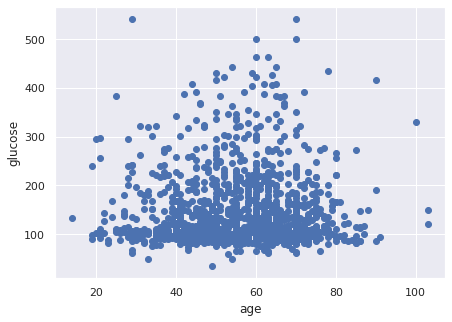

In [74]:
# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(heart['age'], heart['glucose'])
 
# x-axis label
ax.set_xlabel('age')
 
# y-axis label
ax.set_ylabel('glucose')
plt.show()

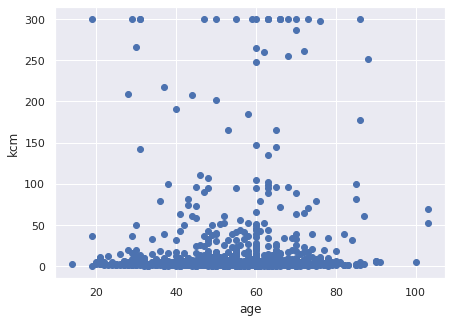

In [77]:
# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(heart['age'], heart['kcm'])
 
# x-axis label
ax.set_xlabel('age')
 
# y-axis label
ax.set_ylabel('kcm')
plt.show()

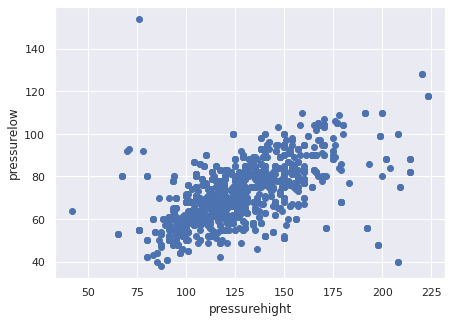

In [79]:
# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(heart['pressurehight'], heart['pressurelow'])
 
# x-axis label
ax.set_xlabel('pressurehight')
 
# y-axis label
ax.set_ylabel('pressurelow')
plt.show()